**Pandas is used for data manipulation**

In [2]:
import pandas as pd

In [3]:
print(pd.__version__)

1.1.5


#Series
used for 1D data

Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.

In [10]:
A = pd.Series([23, 45, 56, 67])

In [11]:
A[0:2] # implicit indexing [can also be done using A.iloc[0: 2]]

0    23
1    45
dtype: int64

In [21]:
print(type(A.values)) # values is numpy array
print(type(A))# this is pandas object
print(type(A.index))
A

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.range.RangeIndex'>


0    23
1    45
2    56
3    67
dtype: int64

In [7]:
A = pd.Series([23, 45, 56, 67], index=['a', 'b', 'c', 'd'])

In [8]:
A['a': 'c']  # explicit indexing [can also be done using A.loc['a': 'c']]

a    23
b    45
c    56
dtype: int64

In [ ]:
A[0:2] # implicit indexing [can also be done using A.iloc[0: 2]]

a    23
b    45
dtype: int64

##Creating Series using dictionary

In [13]:
marks_dict = {'A':80, 'C': 35, 'B':90, 'D': 25}
grade_dict = {'A':2.3, 'B':1.5, 'C': 7.5, 'D': 4.1}

marks = pd.Series(marks_dict)
grades = pd.Series(grade_dict)

print(marks)
print(grades)

A    80
C    35
B    90
D    25
dtype: int64
A    2.3
B    1.5
C    7.5
D    4.1
dtype: float64


#DataFrame

used for 2D data

dataframe can be made of more than one series or we can say that a dataframe is a collection of series that can be used to analyse the data.

In [15]:
D = pd.DataFrame({'Marks': marks, "Grades": grades}) # creating using series

# other ways to create
# first list is 2-D data, second list is row-indexing, third list is col-indexing
print(pd.DataFrame([[1,2,3,4], [5,6,7,8]]))
print()
print(pd.DataFrame([{'A':1,'B':2,'C':3,'D':4}, {'A':5,'B':6,'C':7,'D':8}], ['Marks', 'Gang']))

   0  1  2  3
0  1  2  3  4
1  5  6  7  8

       A  B  C  D
Marks  1  2  3  4
Gang   5  6  7  8


In [16]:
D

,Marks,Grades
A,80,2.3
B,90,1.5
C,35,7.5
D,25,4.1


In [17]:
D.T

,A,B,C,D
Marks,80.0,90.0,35.0,25.0
Grades,2.3,1.5,7.5,4.1


In [18]:
print(type(D.values))
print(D.values)

''' D.values is 2d numpy array so we can acces data with indexing '''

D.values[0, 1]

<class 'numpy.ndarray'>
[[80.   2.3]
 [90.   1.5]
 [35.   7.5]
 [25.   4.1]]


2.3

In [19]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Marks   4 non-null      int64  
 1   Grades  4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 256.0+ bytes


##Slicing

iloc uses index based 
loc uses explicit indexing
ix uses hybrid

In [ ]:
D.iloc[1,:] # iloc is numpy indexing, accessing 1th row data's

Marks     90.0
Grades     1.5
Name: B, dtype: float64

##Add and deleting index in dataframe

In [ ]:
''' dataframe is accessed very much similar to dictionary in python '''

D['ScaledMarks'] = 100*D['Marks']/90
D

,Marks,Grades,ScaledMarks
A,80,2.3,88.888889
B,90,1.5,100.000000
C,35,7.5,38.888889
D,25,4.1,27.777778


In [ ]:
''' deleting an index from dataframe '''
del D['ScaledMarks']
D

,Marks,Grades
A,80,2.3
B,90,1.5
C,35,7.5
D,25,4.1


##Masking

In [ ]:
G = D[D['Marks'] > 70] # similar to numpy array
G

,Marks,Grades
A,80,2.3
B,90,1.5


##Missing Data

In [ ]:
MD = pd.DataFrame([{'A': 10, 'B': 20}, {'A': 15, "C": 30}, {'A':40, 'B':24, 'C':32}])
MD

,A,B,C
0,10,20.0,NaN
1,15,NaN,30.0
2,40,24.0,32.0


In [ ]:
# fill missing with some number
MD.fillna(0)

,A,B,C
0,10,20.0,0.0
1,15,0.0,30.0
2,40,24.0,32.0


In [ ]:
# drop data row's with missing numbers
MD.dropna()

,A,B,C
2,40,24.0,32.0


#Reading files
`inplace = True`, will update same object

`inplace = False`, by default will create new object

can read csv, excel, etc...

In [22]:
# df = pd.read_csv('/home/zero/Downloads/covid_19_data.csv')
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/neylsoncrepalde/projeto_eda_covid/master/covid_19_data.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              26713 non-null  int64  
 1   ObservationDate  26713 non-null  object 
 2   Province/State   12882 non-null  object 
 3   Country/Region   26713 non-null  object 
 4   Last Update      26713 non-null  object 
 5   Confirmed        26713 non-null  float64
 6   Deaths           26713 non-null  float64
 7   Recovered        26713 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df.head(8) # by default shows 5 records

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


##Drop column or row
`axis = 0` mean row

`axis = 1` mean col

In [ ]:
df.drop(['SNo', 'Last Update'], axis=1, inplace = True)

In [ ]:
df.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


##Rename column or row

In [ ]:
df.rename(columns = {'ObservationDate': 'Date', "Province/State": 'State', 'Country/Region':'Country'}, inplace = True)
df.head(7)

,Date,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2.0,0.0,0.0


##Change date format to pandas style

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [ ]:
df2 = df.groupby(['Country'])[['Country', 'Confirmed',	'Deaths',	'Recovered']].sum().reset_index()
df2

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,115615.0,3211.0,13641.0
3,Albania,34319.0,1408.0,20212.0
4,Algeria,183263.0,19089.0,76184.0
...,...,...,...,...
218,Western Sahara,256.0,0.0,144.0
219,Yemen,1190.0,190.0,30.0
220,Zambia,8987.0,166.0,3102.0
221,Zimbabwe,1386.0,171.0,226.0


In [ ]:
df3 = df.groupby(['Country', 'Date'])[['Country', 'Date', 'Confirmed',	'Deaths',	'Recovered']].sum().reset_index()
df3

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
...,...,...,...,...,...
14696,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0
14697,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0
14698,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0
14699,occupied Palestinian territory,2020-03-16,0.0,0.0,0.0


#Matplotlib


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

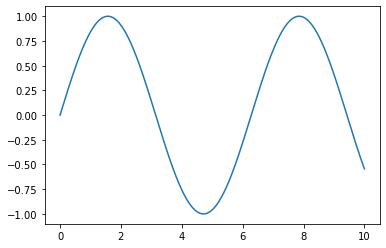

In [ ]:
x = np.linspace(0, 10, 1000) # 1000 increasing number from 0 to 10
y = np.sin(x)
plt.plot(x, y)

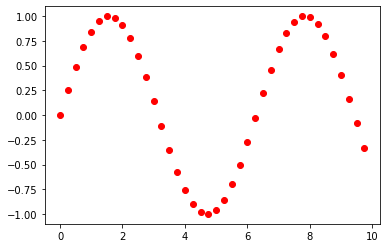

In [ ]:
plt.scatter(x[::25],y[::25], color='red')

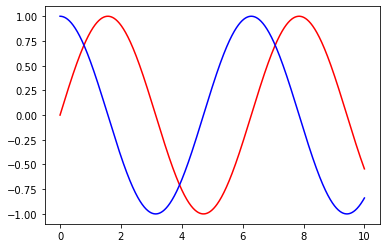

In [ ]:
plt.plot(x, y, color='r')
plt.plot(x, np.cos(x), color='b')

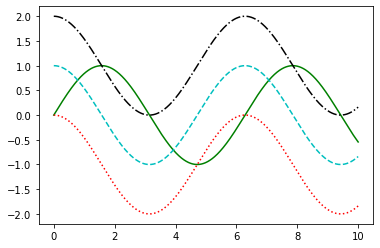

In [ ]:
plt.plot(x, y, '-g') # solid green
plt.plot(x, np.cos(x), '--c') # dashed cyan
plt.plot(x, np.cos(x)+1, '-.k') # dashdot black
plt.plot(x, np.cos(x)-1, ':r') # dotted red

In [ ]:
countrys = df['Country'].unique()

In [ ]:
for i in range(0, len(countrys)):
  C = df[df['Country'] == countrys[i]].reset_index()
  plt.scatter(np.arange(len(C)), C['Confirmed'], color='blue', label='Confirmed')
  plt.scatter(np.arange(len(C)), C['Recovered'], color='green', label='Recovered')
  plt.scatter(np.arange(len(C)), C['Deaths'], color='red', label='Deaths')
  
  plt.title(countrys[i])
  plt.xlabel('Day since the first suspect')
  plt.ylabel('Number of Cases')
  plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
world = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

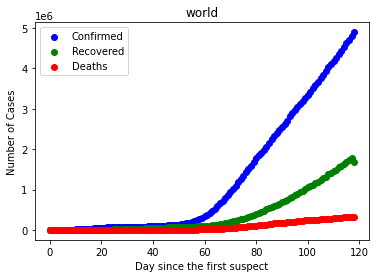

In [ ]:
plt.scatter(np.arange(len(world)), world['Confirmed'], color='blue', label='Confirmed')
plt.scatter(np.arange(len(world)), world['Recovered'], color='green', label='Recovered')
plt.scatter(np.arange(len(world)), world['Deaths'], color='red', label='Deaths')

plt.title('world')
plt.xlabel('Day since the first suspect')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()